### Bayesian Estimation

```
Plan:
DONE - make graph of beta function
DONE - make graph of binomial function
DONE - make graph of normal function
DONE - make sample animated graph

For literacy example - parameter θ (Theta):
- make calc and graph of Prior using Beta function
- make calc and graph of Likelihood using Binomial 
- make calc and graph of Poserior = Prior * Likelihood
- make animated graph woth all 3 components
```

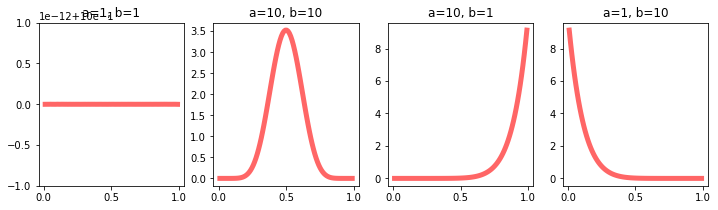

In [1]:
# beta distribution
# https://en.wikipedia.org/wiki/Beta_distribution
# Beta distribution is similar to binomial, 
# it has two parameters (α, β):
#     α-1 - number of successes , probability shifts to the right
#     β-1 - number of failures , probability shifts to the left

# In Bayesian probability theory, 
# the prior and posterior distributions are called "Conjugate"
# if they belong to the same family of distributions
# (and the prior is called a conjugate prior for the likelihood function).

# The beta distribution is the conjugate prior 
# for many distributions: Bernoulli, binomial, negative binomial, geometric distributions.

from scipy.stats import beta
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 4,figsize=(12,3))
params = [(1,1),(10,10),(10,1),(1,10)]
for ii in range(len(ax)):
    a,b = params[ii]
    x = np.linspace(beta.ppf(0.01, a, b), beta.ppf(0.99, a, b), 100)
    x = np.linspace(0.01, 0.99, 100)
    _=ax[ii].plot(x, beta.pdf(x, a, b),'r-', lw=5, alpha=0.6, label='beta pdf')
    _=ax[ii].set_title(f"a={a}, b={b}")

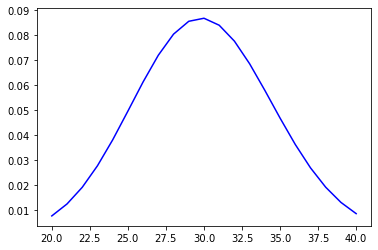

In [2]:
# Binomial distribution
from scipy.stats import binom
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
n, p = 100, 0.3
x = np.arange(binom.ppf(0.01, n, p),
              binom.ppf(0.99, n, p))
_=ax.plot(x, binom.pmf(x, n, p), 'b-', ms=8, label='binom pmf')

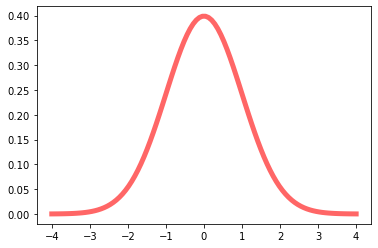

In [3]:
# normal function

from scipy.stats import norm
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
x = np.linspace(norm.ppf(0.01), norm.ppf(0.99), 100)
x = np.linspace(-4, 4, 100)
_=ax.plot(x, norm.pdf(x),
       'r-', lw=5, alpha=0.6, label='norm pdf')

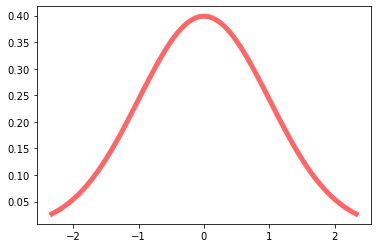

In [5]:
from scipy.stats import norm
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

# Calculate a few first moments:
mean, var, skew, kurt = norm.stats(moments='mvsk')

# Display the probability density function (pdf):
x = np.linspace(norm.ppf(0.01),
                norm.ppf(0.99), 100)
ax.plot(x, norm.pdf(x),
       'r-', lw=5, alpha=0.6, label='norm pdf')

In [6]:
%%capture
# Cell magic command "%%capture" captures the stdout/stderr of a cell.
# This allows you to either discard these streams or store them in a variable.
# If you specify a name, then stdout/stderr will be stored in an object in your namespace.

%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.animation
import numpy as np
_ = plt.clf()

<IPython.core.display.Javascript object>


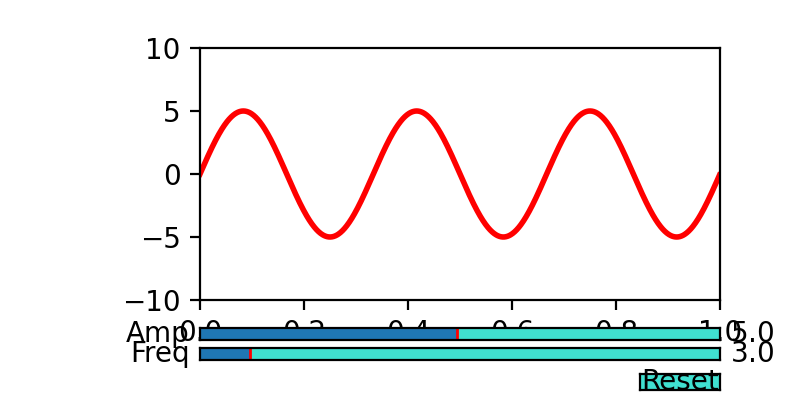

In [7]:
# %matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons

fig, ax = plt.subplots(figsize=(4,2))
plt.subplots_adjust(left=0.25, bottom=0.25)
t = np.arange(0.0, 1.0, 0.001)
a0 = 5 # amplitude
f0 = 3 # frequency
s = a0*np.sin(2*np.pi*f0*t)
l, = plt.plot(t, s, lw=2, color='red') # returns list of lines
plt.axis([0, 1, -10, 10]) # x1,x2,y1,y2

# ----------------------------------------
# draw yellow toolbar using [shift_x, shift_y, width, height]
# see colors names here - https://matplotlib.org/stable/gallery/color/named_colors.html
# axcolor = 'lightgoldenrodyellow'
# axcolor = 'lightblue'
axcolor = 'turquoise'

axfreq = plt.axes([0.25, 0.1, 0.65, 0.03], facecolor=axcolor) # Frequency
axamp = plt.axes([0.25, 0.15, 0.65, 0.03], facecolor=axcolor) # Amplitude

# ----------------------------------------
# define sliders inside yellow toolbars
sfreq = Slider(axfreq, 'Freq', 0.1, 30.0, valinit=f0) # Frequency
samp  = Slider(axamp , 'Amp' , 0.1, 10.0, valinit=a0) # Amplitude


# ----------------------------------------
def update(val):
    amp  = samp.val   # get amplitude from slider
    freq = sfreq.val  # get frequency from slider
    l.set_ydata(amp*np.sin(2*np.pi*freq*t)) # recalculate line
    fig.canvas.draw_idle() # draw canvas

# redraw canvas when sliders are moved
sfreq.on_changed(update)
samp.on_changed(update)

# ----------------------------------------
# add reset button [shift_x, shift_y, width, height]
resetax = plt.axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', color=axcolor, hovercolor='0.975')

def reset(event):
    sfreq.reset()
    samp.reset()
button.on_clicked(reset)

# ----------------------------------------
_ = plt.show()